<font color = 'red'>

<h1> Desafío Elige un nuevo miembro </h1> 

---

<a id = "1"></a>
## Introducción

<p style="text-align: justify;">¡El equipo “High Five” busca nuevos miembros! La competencia para las vacantes fue feroz entre los mejores 5 jugadores y los datos de tres de sus pruebas han llegado. Tu trabajo ahora será generar un reporte con las gráficas que tú creas necesarias para poder entender mejor los datos (el resto del equipo es algo flojo e insisten en sólo leer un reporte con poco texto y gráficas de colores vibrantes y diseños llamativos). </p>

<h2> Prueba 1 </h2> <h4>El score más alto.</h4>
<p style="text-align: justify;"> Durante 30 días se registró el tiempo en minutos que tardó cada jugador en llegar a un score 
determinado. ¿Cómo harías una gráfica para observar su desempeño a lo largo de los 30 días? </p>

*ver archivo adjunto tiempos_para_llegar_al_mejor_score.csv*



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

sbn.set_style("darkgrid")
sbn.set_palette("bright")


plt.style.use('ggplot')

In [2]:
score = pd.read_csv("documentos/tiempos_para_llegar_al_mejor_score.csv")

In [3]:
score["Player ID"].nunique()

5

In [4]:
score.groupby("Player ID")['Minutes to get that score'].describe()

,count,mean,std,min,25%,50%,75%,max
Player ID,,,,,,,,
Player 1,30.0,4.633333,5.950852,0.0,1.25,2.5,8.0,32.0
Player 2,30.0,4.900000,4.641269,0.0,2.00,3.0,8.0,24.0
Player 3,30.0,6.100000,9.458986,1.0,2.00,3.0,4.0,40.0
Player 4,30.0,5.300000,7.197461,0.0,2.00,3.0,8.0,40.0
Player 5,30.0,8.900000,15.254960,0.0,2.00,3.5,8.0,64.0


In [46]:

len(a)

5

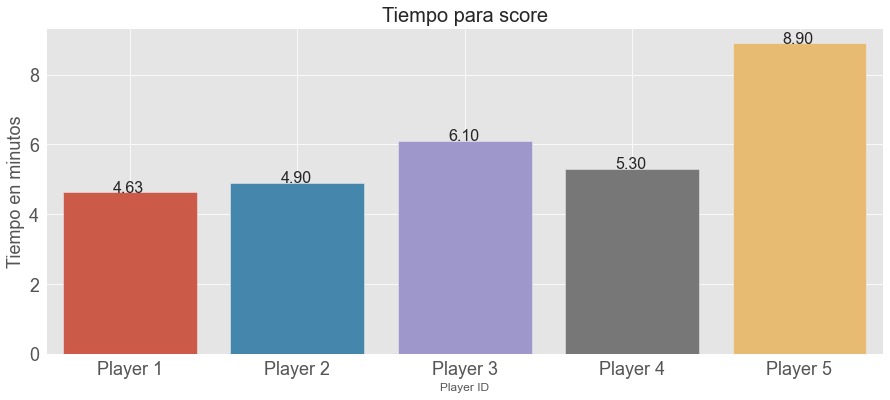

In [5]:
media = score.groupby("Player ID")['Minutes to get that score'].mean()
f, ax = plt.subplots(figsize=(15, 6))
sbn.barplot(x="Player ID", y="Minutes to get that score", data=score, ci=None)
plt.title("Tiempo para score", fontsize=20)

plt.ylabel("Tiempo en minutos",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize = 18)

ax.xaxis.grid(True)

for i in range(len(media)):
    plt.annotate('%1.2f' %media[i], xy=((i-0.1),media[i]),fontsize = 16)
#plt.annotate('Precio promedio %1.2f' %promedios[1], xy=(promedios[1],1),xytext=(2, 1.3), arrowprops=dict(facecolor='orange', shrink=0.01),fontsize = 16)


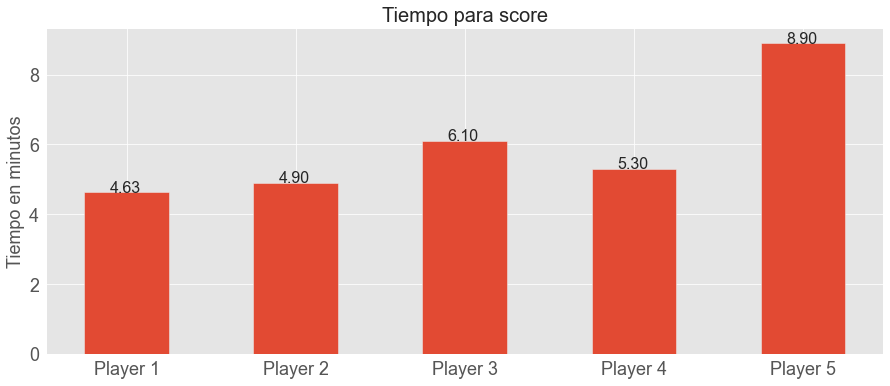

In [8]:

f, ax = plt.subplots(figsize=(15, 6))
plt.bar(list(media.index),media, 0.5)
plt.title("Tiempo para score", fontsize=20)

plt.ylabel("Tiempo en minutos",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize = 18)
#plt.xlim(-1,20)
ax.xaxis.grid(True)
for i in range(len(media)):
    plt.annotate('%1.2f' %media[i], xy=((i-0.1),media[i]),fontsize = 16)


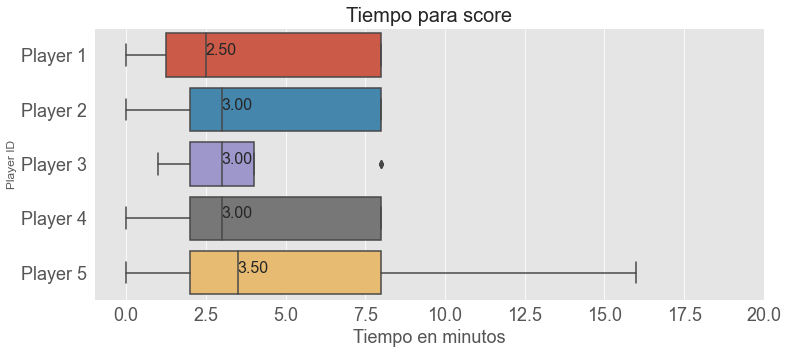

In [7]:
mediana = score.groupby("Player ID")['Minutes to get that score'].median()
f, ax = plt.subplots(figsize=(12, 5))
plt.title("Tiempo para score", fontsize=20)
sbn.boxplot(y="Player ID", x="Minutes to get that score", data=score)
#sbn.violinplot(y="Player ID", x="Minutes to get that score", data=score)
plt.xlabel("Tiempo en minutos",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize = 18)
plt.xlim(-1,20)
ax.xaxis.grid(True)

for i in range(len(mediana)):
    plt.annotate('%1.2f' %mediana[i], xy=(mediana[i],i),fontsize = 16)
#promedios=df.groupby('type').avprice.mean()

<h2> Prueba 2 </h2> <h4>Tu género de videojuego favorito</h4>
<p style="text-align: justify;"> Cada jugador participó en 3 videojuegos de 3 géneros distintos (FPS, ACTION y RPG). En 20 ocasiones para cada videojuego, se calificó la partida. Si la calificación de la partida fue mayor a 10, se considera como exitosa; de otra forma, la partida se considera un fracaso. Para cada videojuego, ¿qué porcentaje de partidas exitosas tuvo cada jugador? </p>

*ver archivo adjunto scores_by_game_and_player.csv*

In [3]:
genero = pd.read_csv("documentos/scores_by_game_and_player.csv")
genero.head()

,Match ID,Player ID,Adventure ID,Score
0,1,Player 1,FPS,4
1,2,Player 2,FPS,0
2,3,Player 3,FPS,58
3,4,Player 4,FPS,19
4,5,Player 5,FPS,3


In [4]:
genero.columns = ['match','player','adventure', 'score']
print("Se jugaron un total de", genero.adventure.nunique(), 'generos de videojuegos')
print('Las categorías son:', str(genero.adventure.unique()))
print('Cada uno de los', genero.player.nunique(), 'jugadores jugó', genero.groupby(['player','adventure']).match.count())

Se jugaron un total de 3 generos de videojuegos
Las categorías son: ['FPS' 'ACTION' 'RPG']
Cada uno de los 5 jugadores jugó player    adventure
Player 1  ACTION       20
          FPS          20
          RPG          20
Player 2  ACTION       20
          FPS          20
          RPG          20
Player 3  ACTION       20
          FPS          20
          RPG          20
Player 4  ACTION       20
          FPS          20
          RPG          20
Player 5  ACTION       20
          FPS          20
          RPG          20
Name: match, dtype: int64


In [13]:
promedio = (genero[genero.score > 10].groupby(['adventure','player']).score.count()/genero.groupby(['adventure','player']).score.count())
action = promedio[0:5]
fps = promedio[5:10]
rpg = promedio[10:15]
titulo = [ 'action', 'fps', 'rpg']

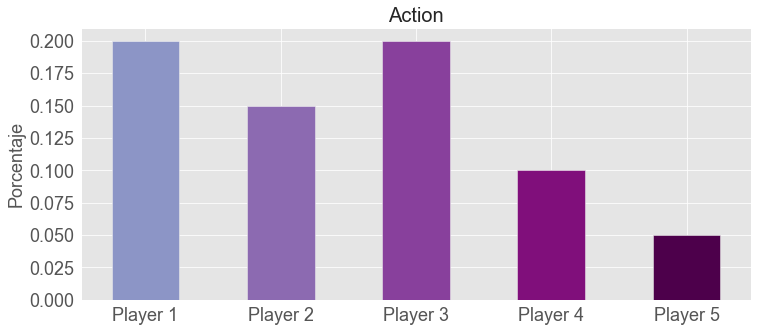

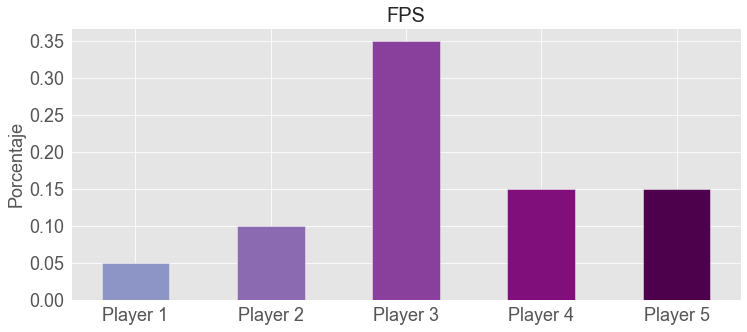

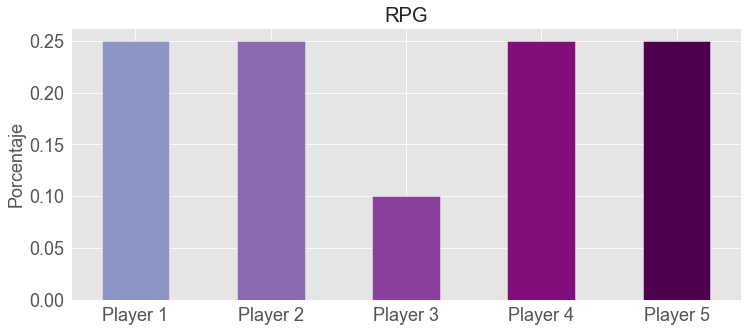

In [27]:
colors = plt.cm.BuPu(np.linspace(0.5, 1, len(genero.player.unique())))
f, ax = plt.subplots(figsize=(12, 5))

plt.bar(genero.player.unique(),action, 0.5, color=colors)
plt.title("Action", fontsize=20)
plt.ylabel("Porcentaje",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize = 18)
    #plt.xlim(-1,20)
ax.xaxis.grid(True)

f, ax = plt.subplots(figsize=(12, 5))

plt.bar(genero.player.unique(),fps, 0.5, color=colors)
plt.title("FPS", fontsize=20)
plt.ylabel("Porcentaje",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize = 18)
    #plt.xlim(-1,20)
ax.xaxis.grid(True)

f, ax = plt.subplots(figsize=(12, 5))

plt.bar(genero.player.unique(),rpg, 0.5, color=colors)
plt.title("RPG", fontsize=20)
plt.ylabel("Porcentaje",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize = 18)
    #plt.xlim(-1,20)
ax.xaxis.grid(True)

<AxesSubplot:xlabel='adventure', ylabel='score'>

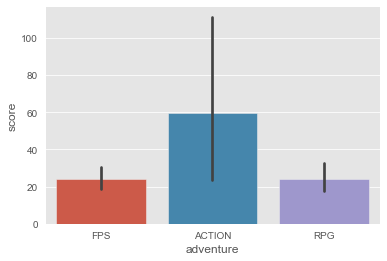

In [29]:
sbn.barplot(x="adventure", y="score", data=exito, hue_order="player")

player    adventure
Player 1  ACTION       AxesSubplot(0.125,0.125;0.775x0.755)
          FPS          AxesSubplot(0.125,0.125;0.775x0.755)
          RPG          AxesSubplot(0.125,0.125;0.775x0.755)
Player 2  ACTION       AxesSubplot(0.125,0.125;0.775x0.755)
          FPS          AxesSubplot(0.125,0.125;0.775x0.755)
          RPG          AxesSubplot(0.125,0.125;0.775x0.755)
Player 3  ACTION       AxesSubplot(0.125,0.125;0.775x0.755)
          FPS          AxesSubplot(0.125,0.125;0.775x0.755)
          RPG          AxesSubplot(0.125,0.125;0.775x0.755)
Player 4  ACTION       AxesSubplot(0.125,0.125;0.775x0.755)
          FPS          AxesSubplot(0.125,0.125;0.775x0.755)
          RPG          AxesSubplot(0.125,0.125;0.775x0.755)
Player 5  ACTION       AxesSubplot(0.125,0.125;0.775x0.755)
          FPS          AxesSubplot(0.125,0.125;0.775x0.755)
          RPG          AxesSubplot(0.125,0.125;0.775x0.755)
Name: score, dtype: object

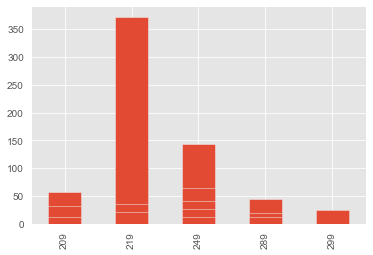

In [24]:
exito.groupby(['player','adventure']).score.plot.bar()

Para poder revisar de mejor manera estos datos se realizara un dataframe para cada uno de los jugadores y así observar mejor sus resultados.

In [11]:
player1 = genero[genero.player == 'Player 1']
player2 = genero[genero.player == 'Player 2']
player3 = genero[genero.player == 'Player 3']
player4 = genero[genero.player == 'Player 4']

In [12]:
player1.groupby('adventure').score.mean()

adventure
ACTION    13.45
FPS        3.35
RPG        8.20
Name: score, dtype: float64

In [13]:
genero.groupby(['player','adventure']).score.describe()

count   mean        std  min   25%  50%    75%    max
player   adventure                                                       
Player 1 ACTION      20.0  13.45  32.687475  0.0  0.75  2.5   7.00  144.0
         FPS         20.0   3.35   4.858796  0.0  0.00  1.5   4.75   19.0
         RPG         20.0   8.20  11.546702  0.0  1.75  3.5   9.75   45.0
Player 2 ACTION      20.0   8.10  15.730962  0.0  0.75  2.0   6.00   64.0
         FPS         20.0   3.40   4.672428  0.0  0.00  2.0   3.00   16.0
         RPG         20.0  11.15  22.866374  0.0  1.75  3.0  11.50  103.0
Player 3 ACTION      20.0   5.85   7.569155  0.0  1.00  3.5   6.75   33.0
         FPS         20.0   9.65  13.989752  0.0  0.75  3.5  15.75   58.0
         RPG         20.0   6.15   8.591765  0.0  0.75  4.5   7.25   37.0
Player 4 ACTION      20.0  22.65  82.408019  0.0  2.00  2.0   6.25  372.0
         FPS         20.0   6.80  11.932265  0.0  0.00  2.0   5.50   42.0
         RPG         20.0   6.05   7.708335  0.0  1.00  2.5   9.50   30.0
Player 5 ACTION      20.0   4.35   3.587625  0.0  2.00  3.5   5.25   16.0
         FPS         20.0   6.40   8.610887  0.0  2.00  4.0   6.25   33.0
         RPG         20.0   6.15   7.154498  0.0  1.75  3.0   8.25   25.0